In [2]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer,wordnet

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading dataset
MBTI_DS = pd.read_csv("mbti_1.csv")
MBTI_DS.tail()

type                                              posts
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

In [4]:
MBTI_DS.isnull().any()

type     False
posts    False
dtype: bool

In [5]:
#dataSet Size
nRow, nCol = MBTI_DS.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [6]:
#Dataset Information
MBTI_DS.dtypes

type     object
posts    object
dtype: object

In [7]:
MBTI_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


**SUMMARY**

- There are only 2 columns in the dataset
- Total no. of rows are 8675
- No null values present in dataset
- One Disadvantage is that all values are textual, hence they have to be converted to numerical form to train the ML model

In [8]:
MBTI_DS.describe(include=['object'])

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

**As we see**
There are 16 unique personality type indicators in the dataset
**INFP** is the most frequently occuring personality type in our dataset

(no. of occurences is 1832)

In [9]:
#unique values from the 'type' of personality column
types = np.unique(np.array(MBTI_DS['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [10]:
total = MBTI_DS.groupby(['type']).count()*50
total

posts
type       
ENFJ   9500
ENFP  33750
ENTJ  11550
ENTP  34250
ESFJ   2100
ESFP   2400
ESTJ   1950
ESTP   4450
INFJ  73500
INFP  91600
INTJ  54550
INTP  65200
ISFJ   8300
ISFP  13550
ISTJ  10250
ISTP  16850

Text(0.5, 1.0, 'Total posts for each personality type')

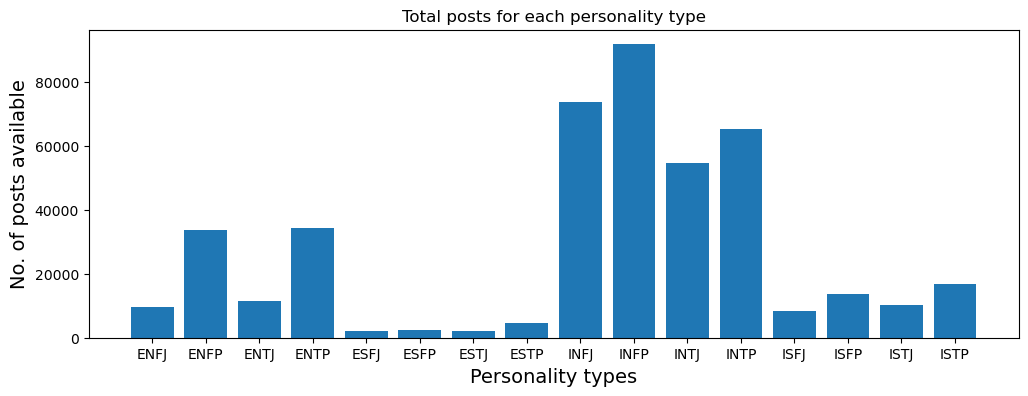

In [11]:
#Data visualization for no. of posts for each personality type

plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

The dataset is clearly unbalanced throughout the different classes. We observe that some of the personality types has a lot more data than others, the most common Kaggle users personality is **INFP (Introvert Intuition Feeling Perceiving)**.

However, we reach this conclusion based on user comments: we can consider for now that users who comment on social media more frequently are more intoverted, perceptive, and emotional.

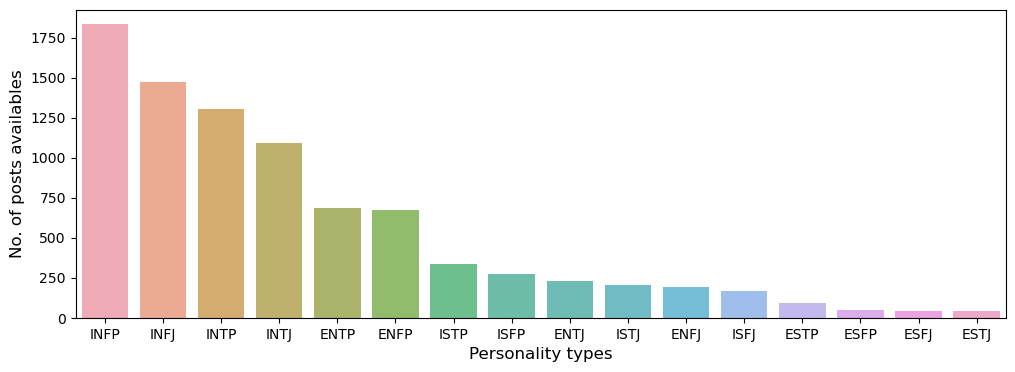

In [12]:
#Plotting this in descending order for better understanding of this visualization
cnt_srs = MBTI_DS['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

Since the original dataset only came with 2 features, the Type and 50 posts for each person, we decided to create additional features for exploring & analysing our dataset.

After we added our features, we did some data exploration to see how the raw data looks and to see how important our features were for distinguishing types across the MBTI personalities. Below are plots further showing the type imbalances in our data.


<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

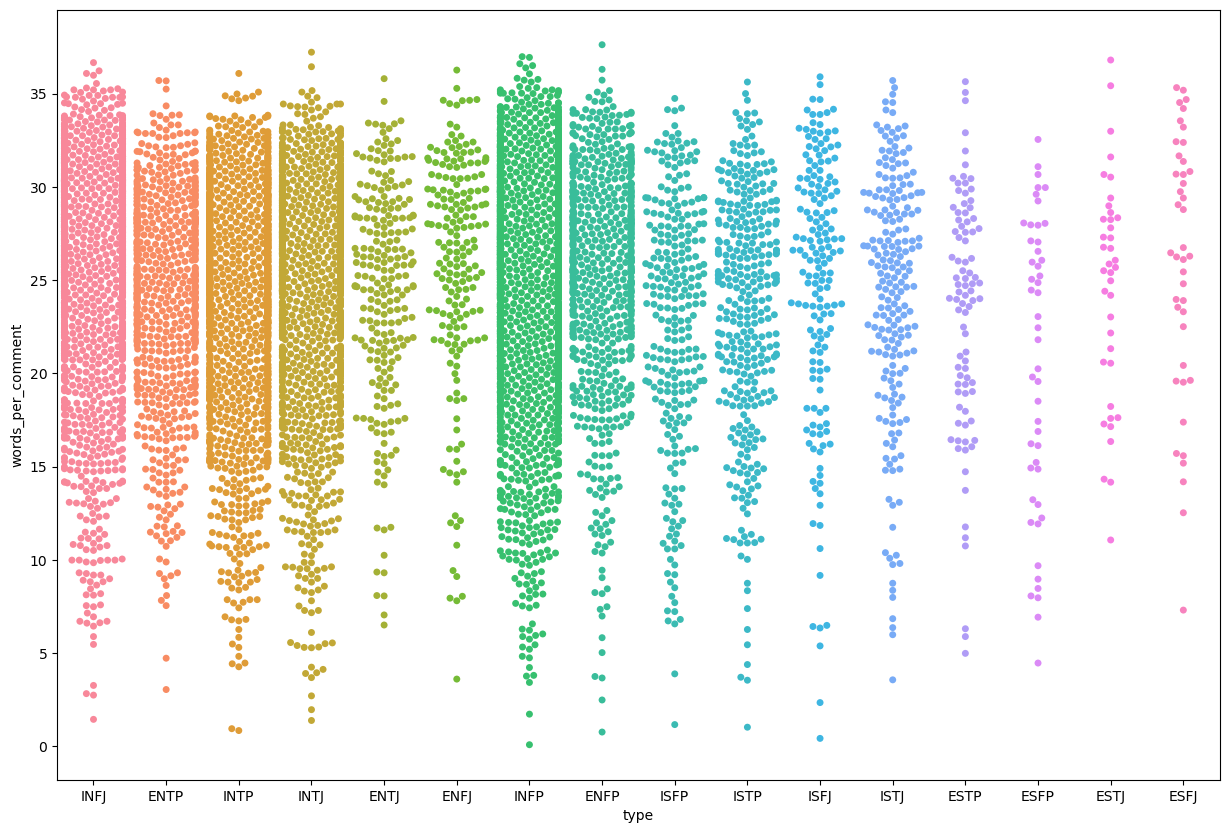

In [13]:
MBTI_DS_C = MBTI_DS.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
MBTI_DS_C['words_per_comment'] = MBTI_DS_C['posts'].apply(lambda x: len(x.split())/50)
MBTI_DS_C['variance_of_word_counts'] = MBTI_DS_C['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=MBTI_DS_C)

This plot further shows clearly that there are a no. of imbalances in our dataset, showing all the observations along with some representation of the underlying distribution using our added features.

INFP has the most cluttered showing there are most no. of comments of this type of personality

<Figure size 2000x1500 with 0 Axes>

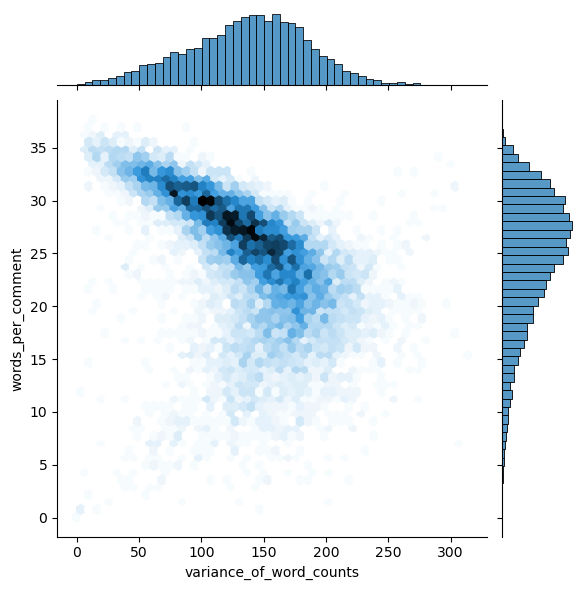

In [14]:
plt.figure(figsize=(20,15))
sns.jointplot("variance_of_word_counts", "words_per_comment", data=MBTI_DS_C, kind="hex")

<Figure size 2400x500 with 0 Axes>

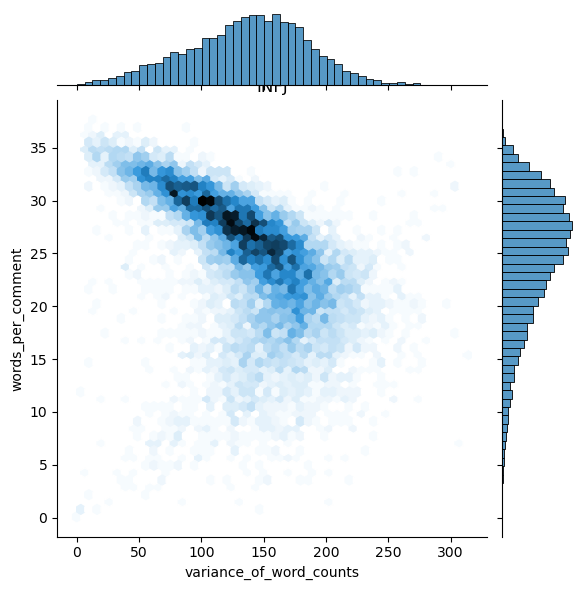

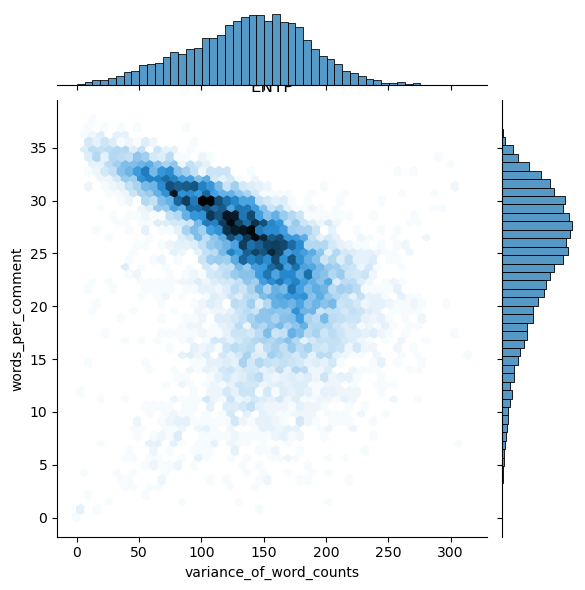

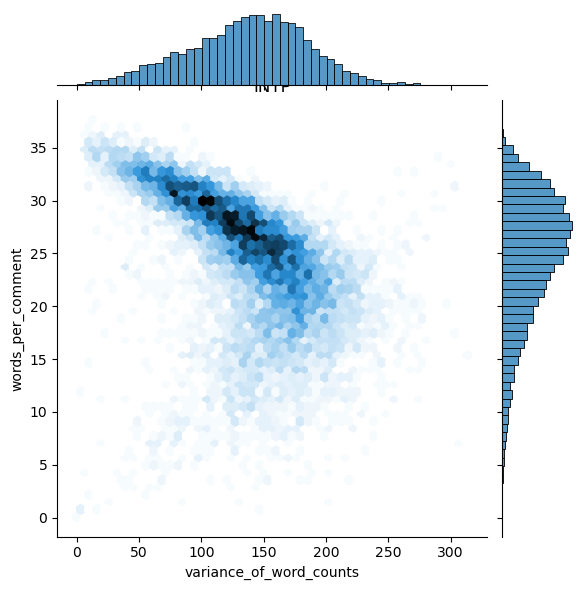

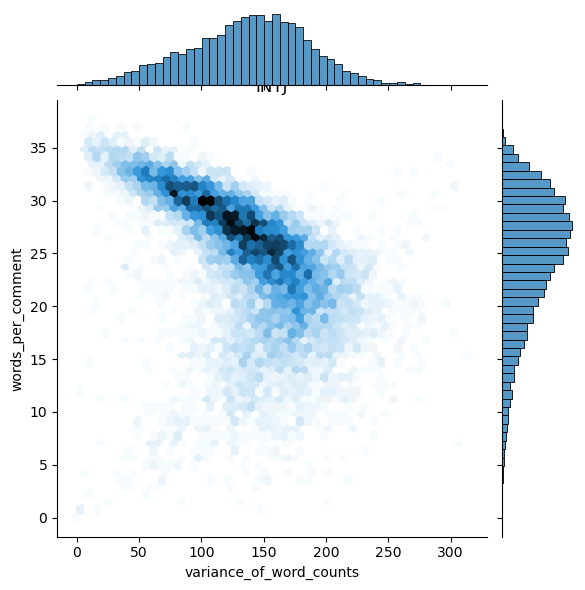

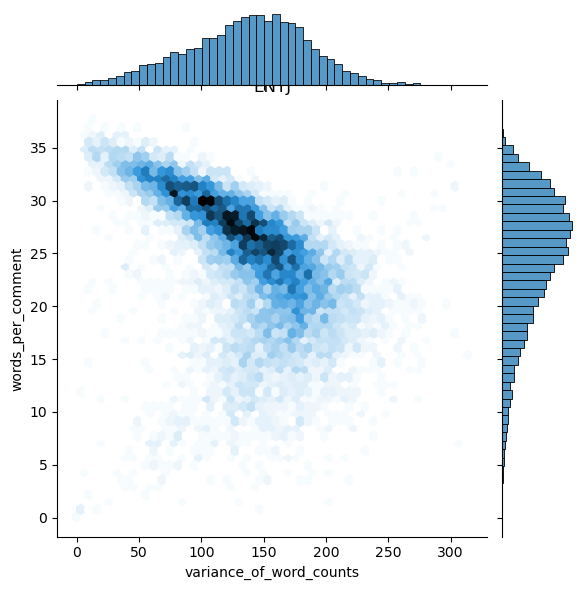

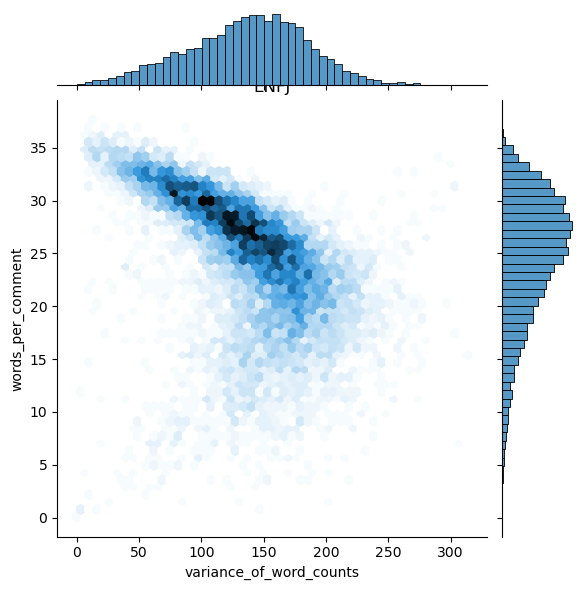

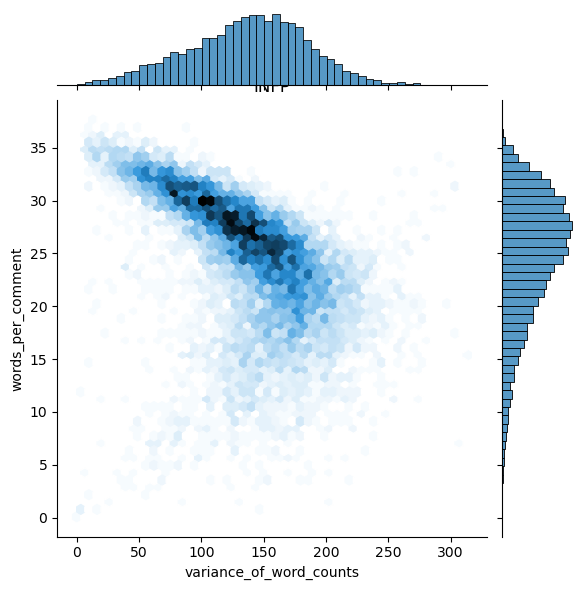

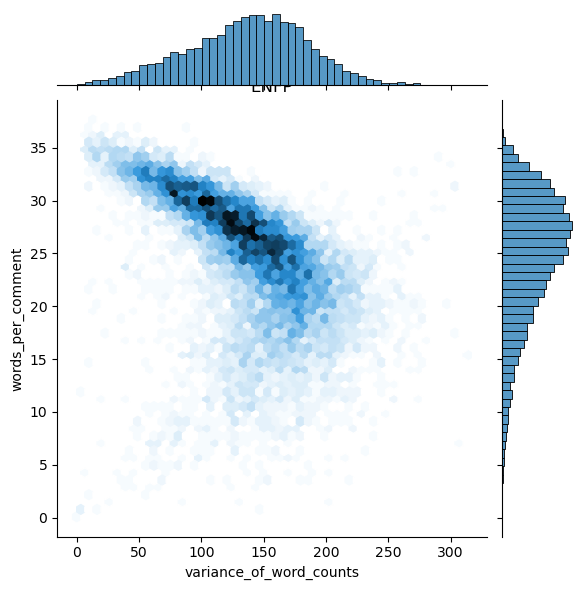

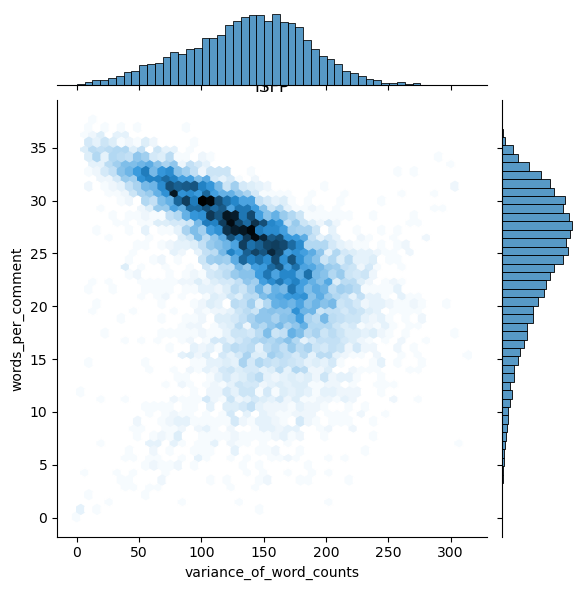

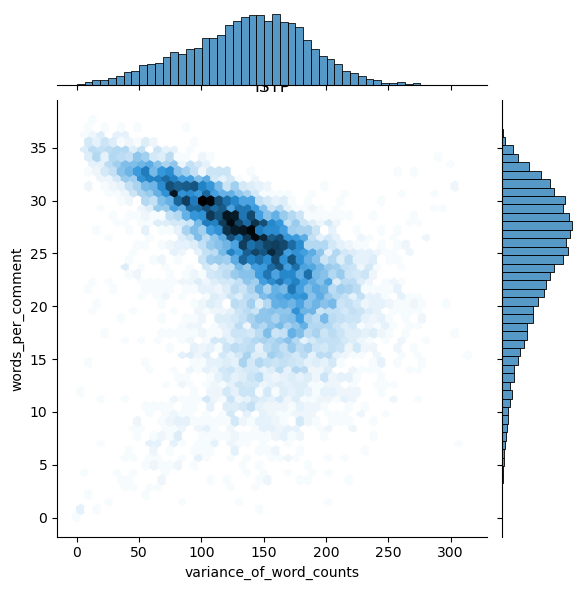

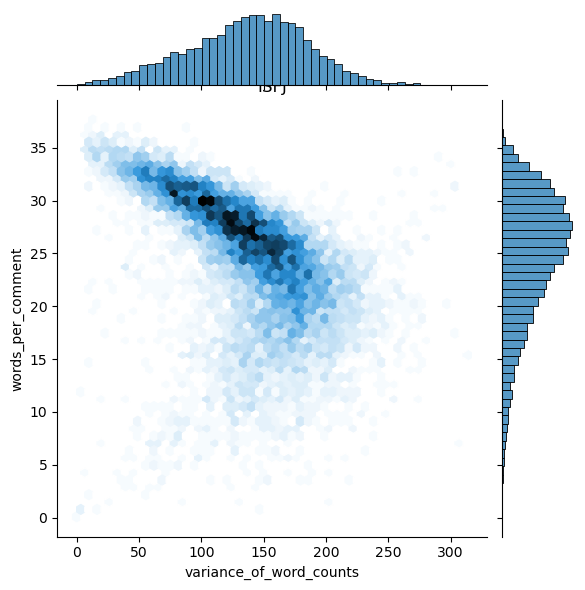

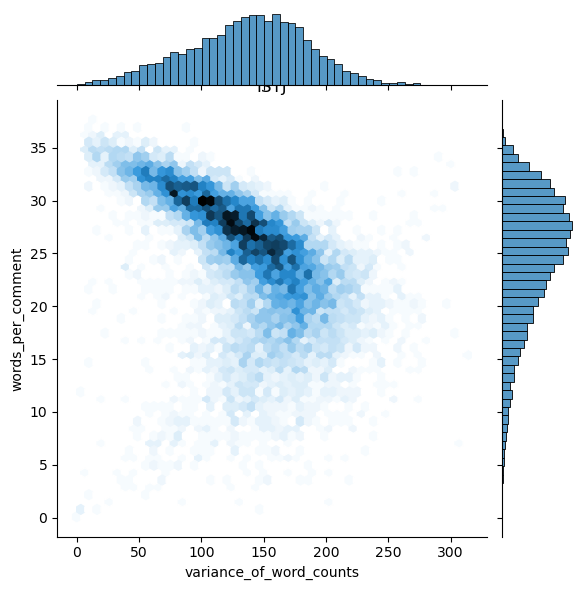

In [15]:
def plot_jointplot(mbti_type, axs, titles):
    MBTI_DS_C1 = MBTI_DS[MBTI_DS['type'] == mbti_type]
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=MBTI_DS_C, kind="hex", ax = axs, title = titles)

plt.figure(figsize=(24, 5))    
i = MBTI_DS['type'].unique()
k = 0

for m in range(1,3):
  for n in range(1,7):
    df_1 = MBTI_DS[MBTI_DS
    ['type'] == i[k]]
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=MBTI_DS_C, kind="hex" )
    plt.title(i[k])
    k+=1
plt.show()

For all the plots you can see that most of the posts have words btw 100-150 and most of no. of words per comment by a user is nearly 25 to 30 range.
Exception to this case is for the plots for ISPJ and ISTJ, but this maybe due to the fact that there are significantly less no. of posts available for these personality types (further shown by the bar plots below)

We can see that there is no correlation observed between variance of word count and the words per comment.

But there is a weak negative correlation observed between the 2 features for few personalities. Maybe this could be due to the low no. of posts available for that type in the given Kaggle dataset.
No useful inferences can be made by analyzing the individual jointplots as the total no of posts for each personlaity type is different.
Hence, these features will not be useful in building our Personality prediction model.


DISTANCE PLOT:

This seaborn visualization method shows the histogram distribution of data for a single column.

Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

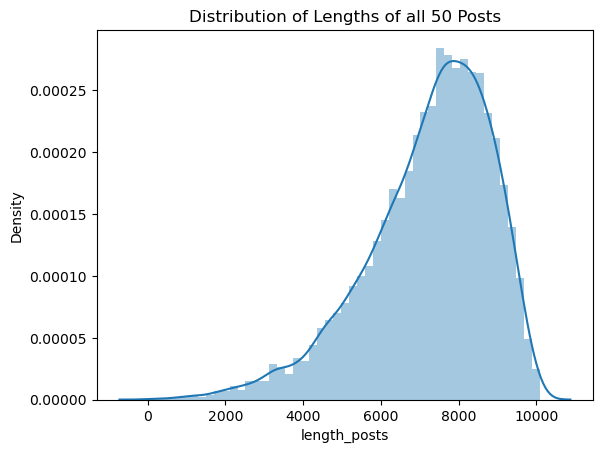

In [16]:
MBTI_DS["length_posts"] = MBTI_DS["posts"].apply(len)
sns.distplot(MBTI_DS["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

We can see that most no of lengthly posts have between 7000-9000 words.
The line that you see represents the kernel density estimation. It is a fundamental data smoothing problem where inferences about the population, based on a finite data sample. This kernel density estimate is a function defined as the sum of a kernel function on every data point.

In [17]:
#Finding the most common words in all posts.
words = list(MBTI_DS["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

The posts majorly contain general words like : I, I'm, so, me, or, if, and, can etc. It is safe to assume that these words won't really provide any useful information to train the ML model as most of them are stop-words, stem-words, or other useless words.
Hence quite a lot pre-processing is required for individual user posts for each peronality type in the given MBTI dataset

WORDCLOUD

WordCloud is a technique to show which words are the most frequent among the given text.

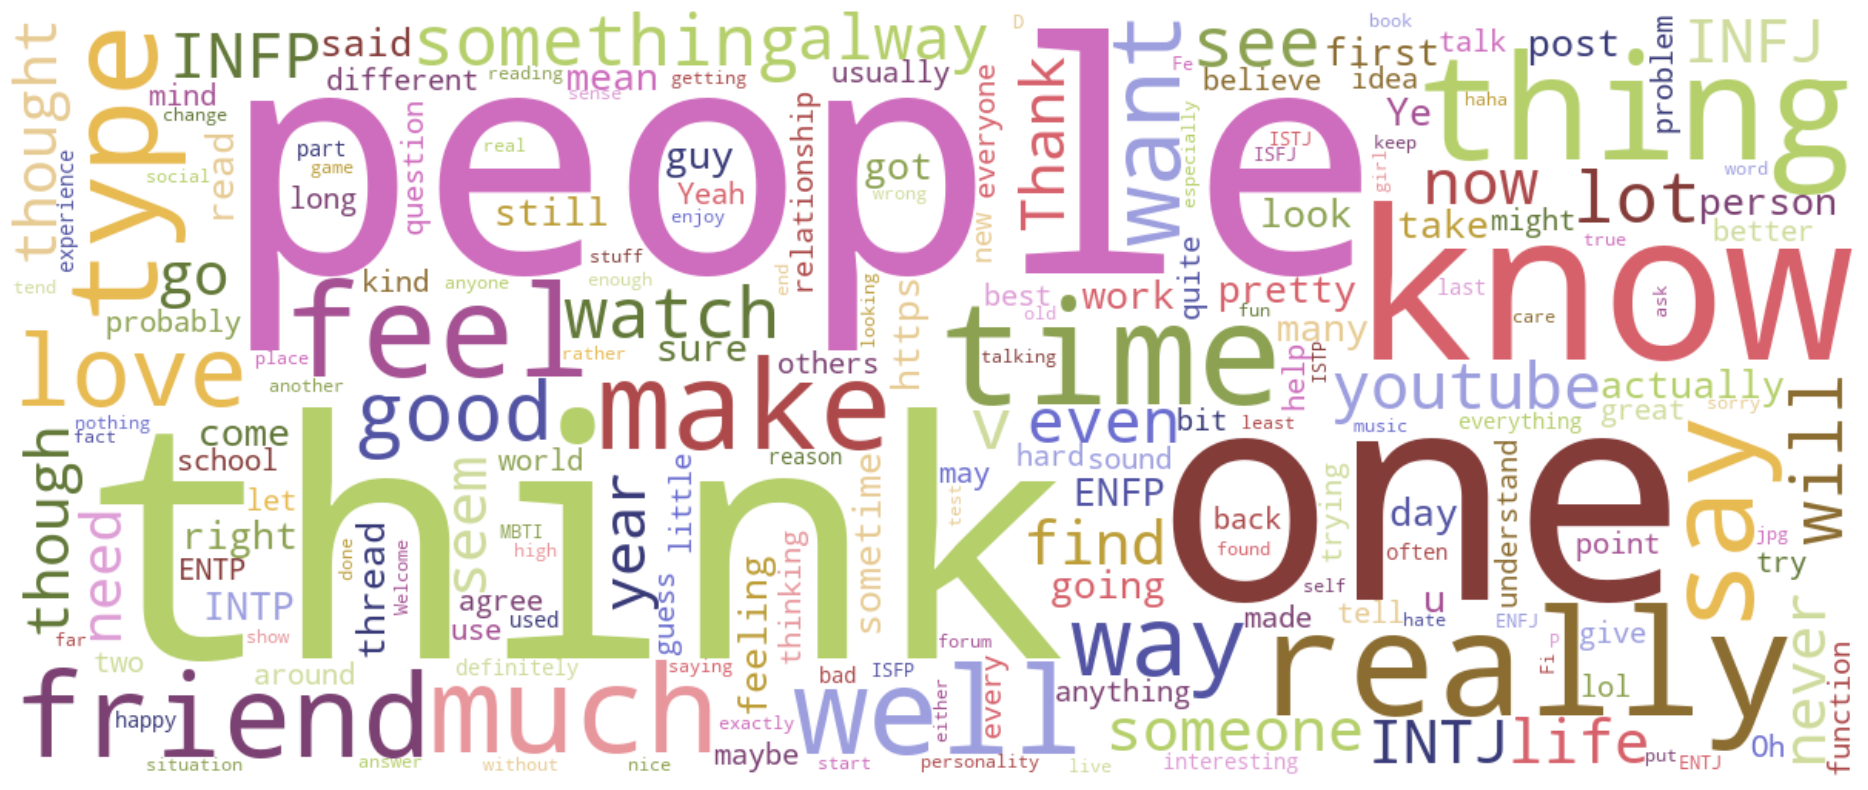

In [18]:
#Plotting the most common words with WordCloud.
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

Now we see the Wordclouds for each Personality Type. We produced 16 Word Clouds for 16 groups of personality. These word clouds are generated such that the size of each word is proportional to its appearance frequency in the top posts. We consider these word clouds to be illustrative of some of the unique ways that different MBTIs use language.

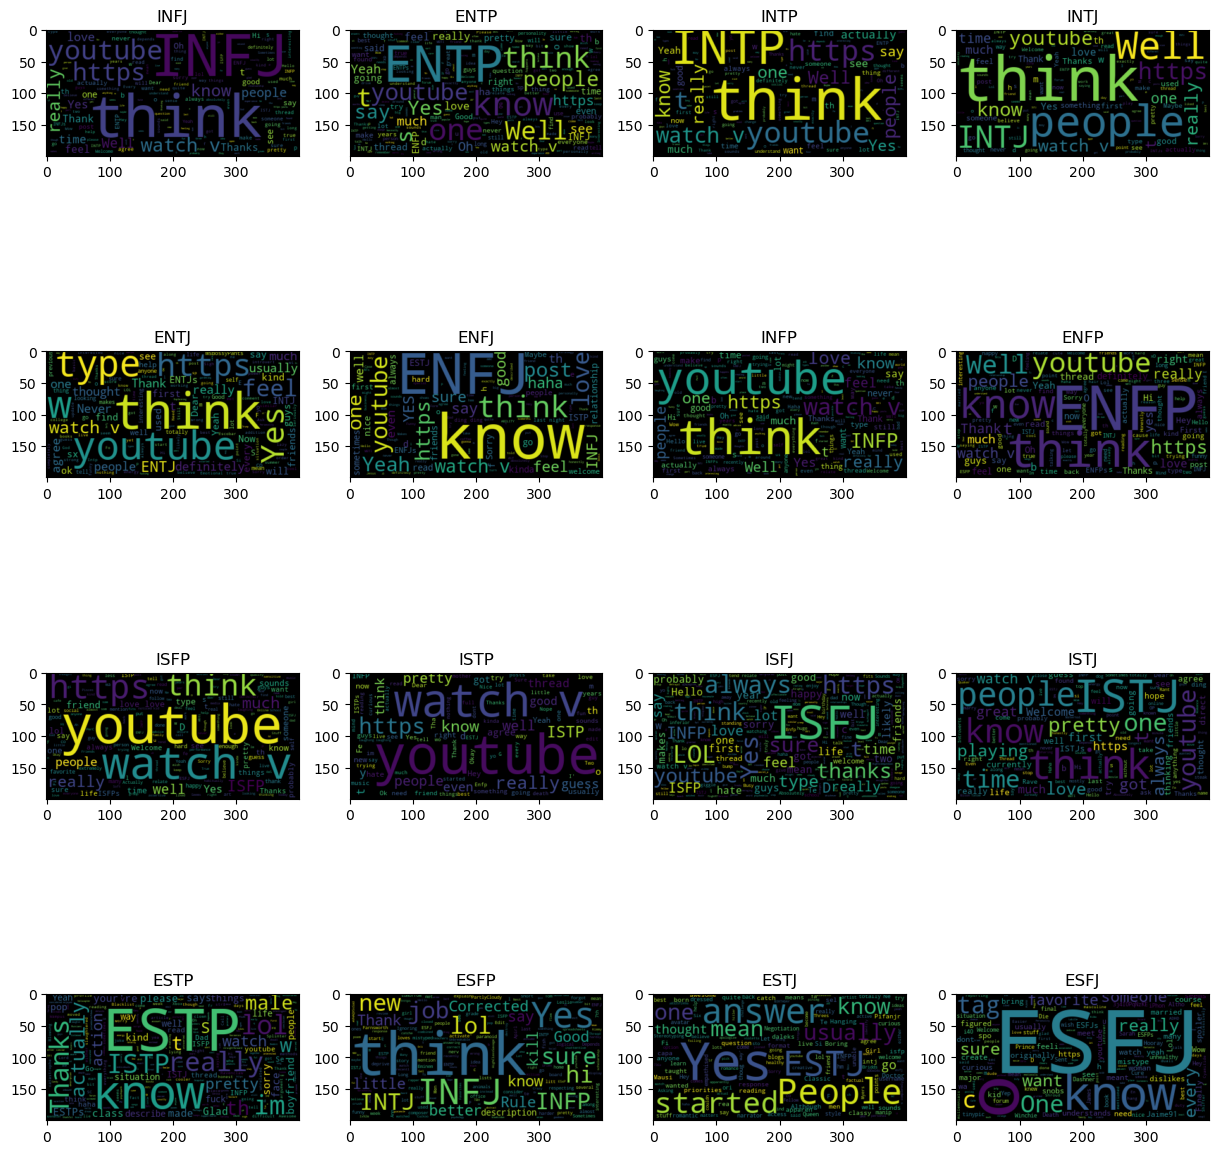

In [19]:
fig, ax = plt.subplots(len(MBTI_DS['type'].unique()), figsize=(15,len(MBTI_DS['type'].unique())))
k = 0
for i in MBTI_DS['type'].unique():
    df_4 = MBTI_DS[MBTI_DS['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

we can see there are a no. of irrelevant words present in the dataset (e.g. ha, ar, Ti etx.) which will need to be removed
Interestingly, among the most common words in the word clouds of individual personality types, is the names of MBTI personlity types themselves.
It would hence be necessary to clean our posts by removing these MBTI words from each of them as part of our pre-processing stage, before training the model for better evaluation results.


Now we add columns for personality type indicators



In [20]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

MBTI_DS_N = MBTI_DS.join(MBTI_DS.apply (lambda row: get_types (row),axis=1))
MBTI_DS_N.head(5)


type                                              posts  length_posts  IE  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...          4652   1   
1  ENTP  'I'm finding the lack of me in these posts ver...          7053   0   
2  INTP  'Good one  _____   https://www.youtube.com/wat...          5265   1   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...          6271   1   
4  ENTJ  'You're fired.|||That's another silly misconce...          6111   0   

   NS  TF  JP  
0   1   0   1  
1   1   1   0  
2   1   1   0  
3   1   1   1  
4   1   1   1

Using the above code, if a person has I, N, T and J, the value across the 4 axis of MBTI i.e. IE, NS, TF and JP respectively, will be 1. Else 0.
This will help us calculate for e.g. how many Introvert posts are present v/s how many Extrovert posts are presnt, out of all the given entries in our labelled Kaggle dataset. This is done in order to extplore the dataset for all the individual Personality Indices of MBTI



Counting No. of posts in one class / Total no. of posts in the other class



In [21]:
print ("Introversion (I) |  Extroversion (E): \t", MBTI_DS_N['IE'].value_counts()[0], " | ", MBTI_DS_N['IE'].value_counts()[1])
print ("Intuition    (N) |  Sensing      (S): \t", MBTI_DS_N['NS'].value_counts()[0], " | ", MBTI_DS_N['NS'].value_counts()[1])
print ("Thinking     (T) |  Feeling      (F): \t", MBTI_DS_N['TF'].value_counts()[0], " | ", MBTI_DS_N['TF'].value_counts()[1])
print ("Judging      (J) |  Perceiving   (P): \t", MBTI_DS_N['JP'].value_counts()[0], " | ", MBTI_DS_N['JP'].value_counts()[1])


Introversion (I) |  Extroversion (E): 	 1999  |  6676
Intuition    (N) |  Sensing      (S): 	 1197  |  7478
Thinking     (T) |  Feeling      (F): 	 4694  |  3981
Judging      (J) |  Perceiving   (P): 	 5241  |  3434


We infer that there is unequal distribution even among each of the 4 axis in the entries of out dataset. i.e. out of IE:E is the majority, in NS:S is the majority. While TF and JP have realtively less differnce between them.


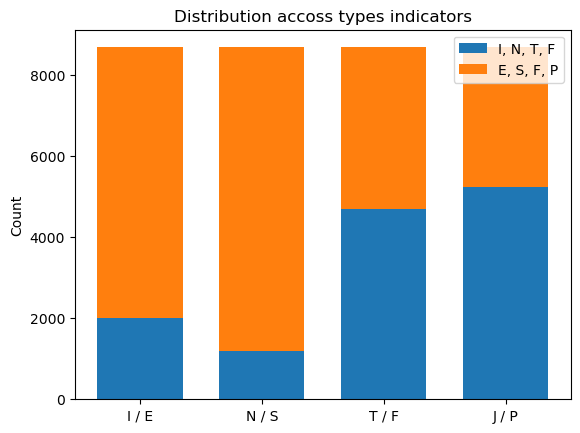

In [22]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (MBTI_DS_N['IE'].value_counts()[0], MBTI_DS_N['NS'].value_counts()[0], MBTI_DS_N['TF'].value_counts()[0], MBTI_DS_N['JP'].value_counts()[0])
top = (MBTI_DS_N['IE'].value_counts()[1], MBTI_DS_N['NS'].value_counts()[1], MBTI_DS_N['TF'].value_counts()[1], MBTI_DS_N['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7           # or len(x) can also be used here

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()


Fun Fact : The above results match with real life findings by researchers across various personality and psycological studies like

We can compare this with the fact that Introverts are a minority, making up roughly 16 percent of people [1]. Eventhough among introverts, there are varying degrees, and Carl Jung said, “There is no such thing as a pure Extrovert or a pure introvert" Hence it is tricky to classify a person with 1 type.

While the population is split roughly 50/50 on the other dimensions, a full 70% of people show a preference for Sensing over Intuition when taking a personality test. Because Intuitives are the minority, the onus is on them to adjust to the Sensor way of thinking.

The differences between Judging and Perceiving are probably the most marked differences of all the four preferences. People with strong Judging preferences might have a hard time accepting people with strong Perceiving preferences, and vice-versa. On the other hand, a "mixed" couple (one Perceiving and one Judging) can complement each other very well, if they have developed themselves enough to be able to accept each other's differences.



<AxesSubplot:title={'center':'Features Correlation Heatmap'}>

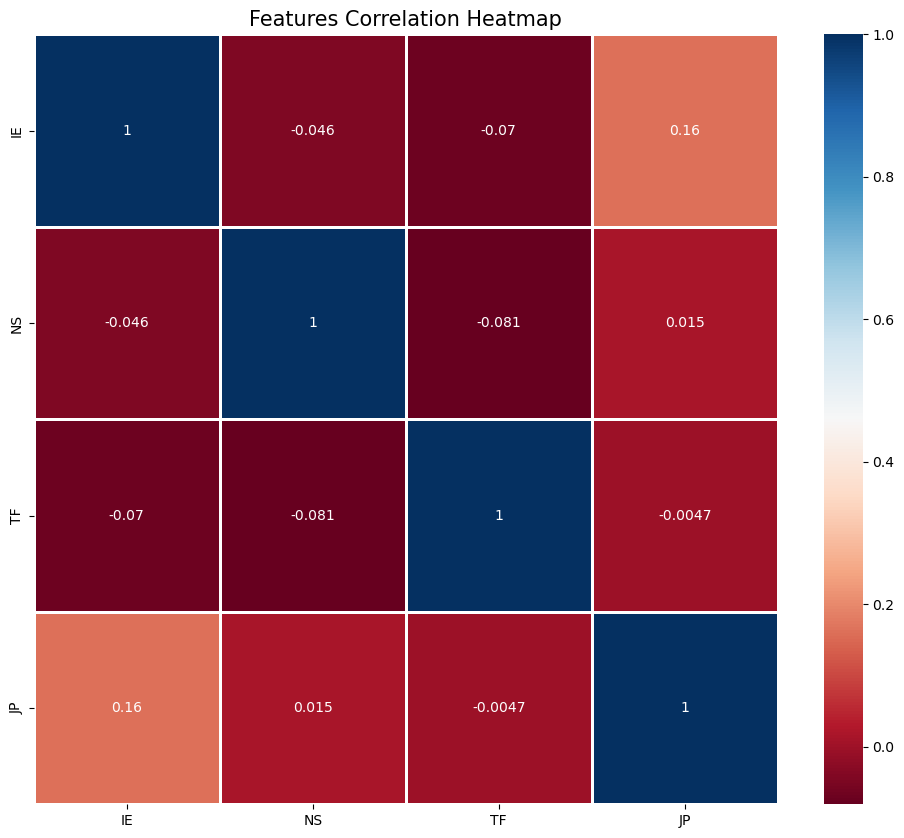

In [23]:
cmap = plt.cm.RdBu
corr = MBTI_DS_N[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)


From this heatmap also, it is unclear if it shows anything valuable for interpretation



we can see there are a no. of irrelevant words present in the dataset (e.g. ha, ar, Ti etx.) which will need to be removed
Interestingly, among the most common words in the word clouds of individual personality types, is the names of MBTI personlity types themselves.
It would hence be necessary to clean our posts by removing these MBTI words from each of them as part of our pre-processing stage, before training the model for better evaluation results.


Pre-Processing Stage
We preprocess the posts by using Lemmitization technique. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words, hence we use this instead in our model. So it links words with similar meaning to one word.

In [24]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# Or we can use Label Encoding (as above) of this unique personality type indicator list
# from sklearn.preprocessing import LabelEncoder
# unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
#        'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
# lab_encoder = LabelEncoder().fit(unique_type_list)

Binarizing the each personality type feature



In [25]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in MBTI_DS_N.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)


Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


Cleaning of data in the posts




In [26]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to /Users/mmaraqa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mmaraqa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [27]:
def pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_MBTI_DS_N = len(MBTI_DS_N)
  i=0
  
  for row in MBTI_DS_N.iterrows():
      #Remove and clean comments
      posts = row[1].posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", MBTI_DS_N.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", MBTI_DS_N.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])


Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

In [28]:
nRow, nCol = list_personality.shape
print(f'Number of posts = {nRow}  and No. of Personalities = {nCol} ')


Number of posts = 8675  and No. of Personalities = 4 


Feature Engineering
Tf–idf for feature engineering evaluates how relevant/important a word is to a document in a collection of documnets or corpus. As we train individual classifiers here, it is very useful for scoring words in machine learning algorithms for Natural Language Processing.

For our model we vectorize using count vectorizer and tf-idf vectorizer keeping the words appearing btw 10% to 70% of the posts.

In [29]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 
# the feature should be made of word n-gram 

# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)


Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'across'), (4, 'act'), (5, 'action'), (6, 'actually'), (7, 'add'), (8, 'advice'), (9, 'afraid')]

Using Tf-idf :
Now the dataset size is as below
(8675, 595)


Therefore we now have 595 features for each user post.


Splitting into X and Y variable

linkcode
Hence we split the features as :

X: User Posts in TF-IDF representation

Y: Personality type in Binarized MBTI form

In [30]:

personality_type = [ "IE: Introversion (I) | Extroversion (E)", "NS: Intuition    (N) | Sensing      (S)", 
                   "FT: Feeling      (F) | Thinking     (T)", "JP: Judging      (J) | Perceiving   (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])


IE: Introversion (I) | Extroversion (E)
NS: Intuition    (N) | Sensing      (S)
FT: Feeling      (F) | Thinking     (T)
JP: Judging      (J) | Perceiving   (P)


Let's see how the posts look in TF-IDF representation: (we have taken 1st post for demonstration)

In [31]:
print("X: First post in tf-idf representation\n%s" % X_tfidf[0])


X: First post in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08105478 0.07066064
 0.         0.         0.         0.         0.         0.
 0.         0.04516864 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05321691 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0871647  0.         0.         0.
 0.         0.         0.         0.05506308 0.0708757  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16585935 0.         0.         0.09676192 0.
 0.         0.04970682 0.         0.         0.         0.
 0.07397056 0.         0.         0.         0.         0.
 0.      

Let's see how the posts look in Binarized MBTI personality indicator representation: (we have taken 1st post for demonstration)


In [32]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])


For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


Therefore we have successfully converted the textual data into numerical form



In [33]:
# Posts in tf-idf representation
X = X_tfidf

In [34]:
#XGBoost model for MBTI dataset 
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))


IE: Introversion (I) | Extroversion (E) Accuracy: 76.18%
NS: Intuition    (N) | Sensing      (S) Accuracy: 85.92%
FT: Feeling      (F) | Thinking     (T) Accuracy: 67.73%
JP: Judging      (J) | Perceiving   (P) Accuracy: 62.87%


In [35]:
X = X_tfidf
Y = list_personality[:,l]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)


In [36]:
#XGBoost model for MBTI dataset 
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    print("%s Classification report for Train Data" % (personality_type[l]))
    print(classification_report(y_train,model.predict(X_train)))
    print("%s Classification report for Test Data" % (personality_type[l]))
    print(classification_report(y_test, y_pred))
    print("\n")


IE: Introversion (I) | Extroversion (E) Accuracy: 76.18%
IE: Introversion (I) | Extroversion (E) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4447
           1       1.00      0.94      0.97      1365

    accuracy                           0.99      5812
   macro avg       0.99      0.97      0.98      5812
weighted avg       0.99      0.99      0.99      5812

IE: Introversion (I) | Extroversion (E) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2229
           1       0.37      0.11      0.17       634

    accuracy                           0.76      2863
   macro avg       0.58      0.53      0.51      2863
weighted avg       0.70      0.76      0.71      2863



NS: Intuition    (N) | Sensing      (S) Accuracy: 85.92%
NS: Intuition    (N) | Sensing      (S) Classification report for Train Data


In [37]:
# Adaboost Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=1)
adabst_fit = AdaBoostClassifier(base_estimator= dtree,n_estimators=5000,learning_rate=0.05,random_state=42)
adabst_fit.fit(X_train, y_train)
print ("\nAdaBoost - Train Confusion Matrix\n\n", pd.crosstab(y_train,adabst_fit.predict(X_train), rownames = ["Actuall"],colnames =["Predicted"]))
print ("\nAdaBoost - Train accuracy",round(accuracy_score(y_train,adabst_fit.predict(X_train)), 3))
print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(X_train)))


AdaBoost - Train Confusion Matrix

 Predicted     0     1
Actuall              
0          1453   862
1           271  3226

AdaBoost - Train accuracy 0.805

AdaBoost  - Train Classification Report
               precision    recall  f1-score   support

           0       0.84      0.63      0.72      2315
           1       0.79      0.92      0.85      3497

    accuracy                           0.81      5812
   macro avg       0.82      0.78      0.79      5812
weighted avg       0.81      0.81      0.80      5812




K-value 1

K-Nearest Neighbors - Train ConfusionMatrix

 Predicted     0     1
Actuall              
0          2291    24
1             0  3497

K-Nearest Neighbors - Train accuracy: 0.996

K-Nearest Neighbors - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2315
           1       0.99      1.00      1.00      3497

    accuracy                           1.00      5812
   macro avg       1.00      0.99      1.00      5812
weighted avg       1.00      1.00      1.00      5812


K-value 2

K-Nearest Neighbors - Train ConfusionMatrix

 Predicted     0     1
Actuall              
0          2315     0
1           270  3227

K-Nearest Neighbors - Train accuracy: 0.954

K-Nearest Neighbors - Train Classification Report
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      2315
           1       1.00      0.92      0.96      3497

    accuracy           

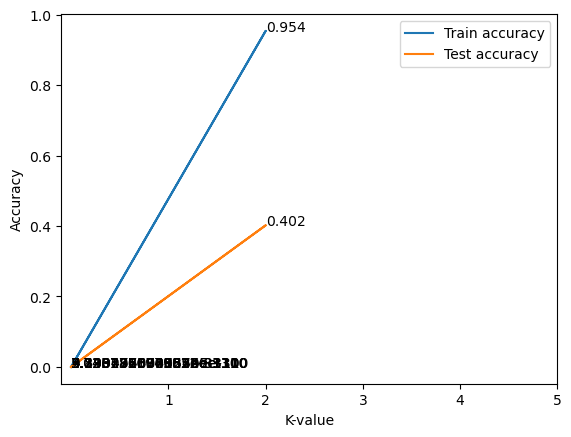

In [38]:
#KNN Classifier
from sklearn.metrics import accuracy_score,classification_report

# Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]
k_vals = [1,2]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(X_train,y_train)
    print ("\nK-value",k_vals[i])
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(X_train)),3)
    print ("\nK-Nearest Neighbors - Train ConfusionMatrix\n\n",pd.crosstab( y_train, knn_fit.predict(X_train),rownames =["Actuall"],colnames = ["Predicted"]) )
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(X_train)))
    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(X_test)),3)
print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab( y_test,knn_fit.predict(X_test),rownames =["Actuall"],colnames = ["Predicted"]))
print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(X_test)))
k_valchart.loc[i, 'K_value'] = k_vals[i]
k_valchart.loc[i, 'Train_acc'] = tr_accscore
k_valchart.loc[i, 'Test_acc'] = ts_accscore

import matplotlib.pyplot as plt

# plot the train and test accuracy scores for different K-values
plt.plot(k_valchart['K_value'], k_valchart['Train_acc'], label='Train accuracy')
plt.plot(k_valchart['K_value'], k_valchart['Test_acc'], label='Test accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_valchart['K_value'])
plt.xticks([1,2,3,4,5])
for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)
for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
plt.legend()
plt.show()


In [39]:
# Logistic Regression for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    print("%s Classification report for Train Data" % (personality_type[l]))
    print(classification_report(y_train,model.predict(X_train)))
    print("%s Classification report for Test Data" % (personality_type[l]))
    print(classification_report(y_test, y_pred))
    print("\n")

IE: Introversion (I) | Extroversion (E) Accuracy: 77.54%
IE: Introversion (I) | Extroversion (E) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.79      0.99      0.87      4447
           1       0.73      0.12      0.21      1365

    accuracy                           0.78      5812
   macro avg       0.76      0.55      0.54      5812
weighted avg       0.77      0.78      0.72      5812

IE: Introversion (I) | Extroversion (E) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2229
           1       0.46      0.08      0.14       634

    accuracy                           0.78      2863
   macro avg       0.62      0.53      0.50      2863
weighted avg       0.72      0.78      0.71      2863



NS: Intuition    (N) | Sensing      (S) Accuracy: 86.06%
NS: Intuition    (N) | Sensing      (S) Classification report for Train Data
